# L6.2 The variance-bias tradeoff and cross-validation

In many modeling problems, we are given the choice between models with many degrees of freedom, leading to flexibility but high complexity, or a model with few degrees of freedom but with simplicity and ease of interpretation.



In [23]:
# plot settings
options(repr.plot.width=6, repr.plot.height=6)

Generate a polynomial model with iid Gaussian noise, with $N_{\rm obs}$ data points.


Fit with a polynomial. Note this is a general additive model, so we can use lm. We can compute the sum-of-squared residuals SSR.



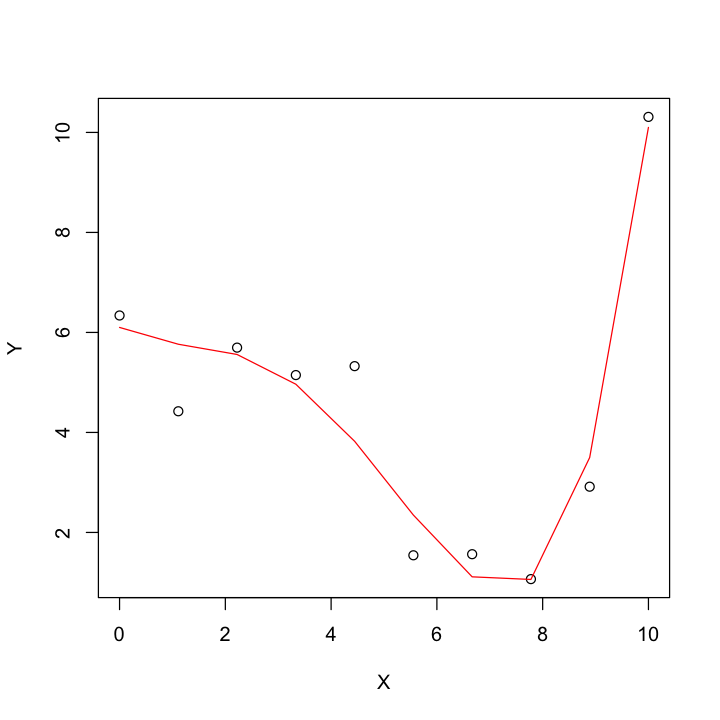

In [24]:
# Simulate some linear data with noise
NObs <- 10

beta0 <-  6.1
beta1 <- -0.6
beta2 <-  0.4
beta3 <- -0.13
beta4 <-  0.01

sigma <- 0.8

X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

YBar <- beta0 + beta1*X + beta2*X^2 + beta3*X^3 + beta4*X^4

Y <- YBar + eps

plot(X,Y)
lines(X,YBar, col='red')

In [25]:
fitModel <- lm(Y~ X + I(X^2 ) + I(X^3 ) + I(X^4 ))

fitModel

SSR <- sum((predict(fitModel) - mean(Y))^2)

SSR



Call:
lm(formula = Y ~ X + I(X^2) + I(X^3) + I(X^4))

Coefficients:
(Intercept)            X       I(X^2)       I(X^3)       I(X^4)  
    6.08264     -1.77657      1.10013     -0.24765      0.01597  


[1] 67.57282

We can do this for various degrees of the polynomial, $N_{\rm poly}$.


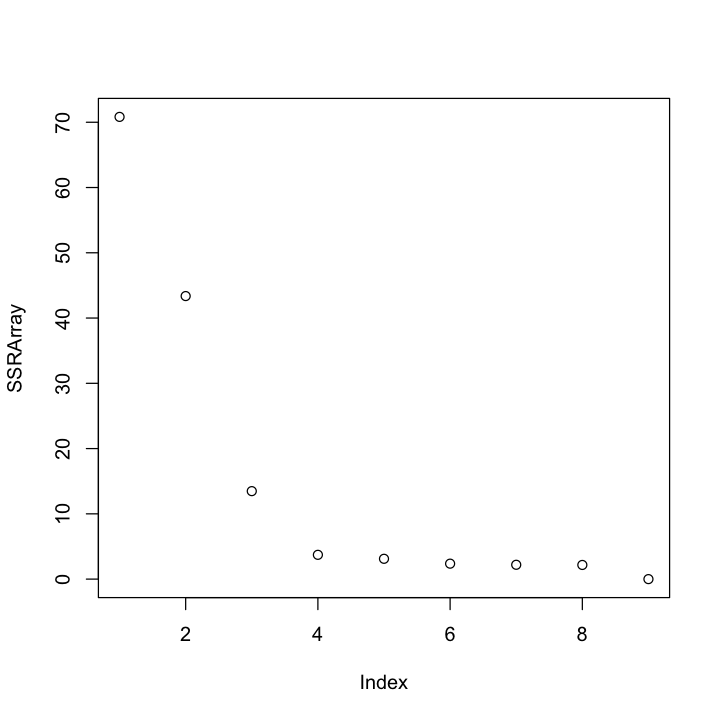

In [26]:

SSRArray <-0

fitModel <- lm(Y~ X )
SSRArray[1] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) )
SSRArray[2] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) )
SSRArray[3] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) )
SSRArray[4] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) )
SSRArray[5] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) )
SSRArray[6] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) )
SSRArray[7] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) )
SSRArray[8] <- sum((predict(fitModel) - Y)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) )
SSRArray[9] <- sum((predict(fitModel) - Y)^2)

plot(SSRArray)


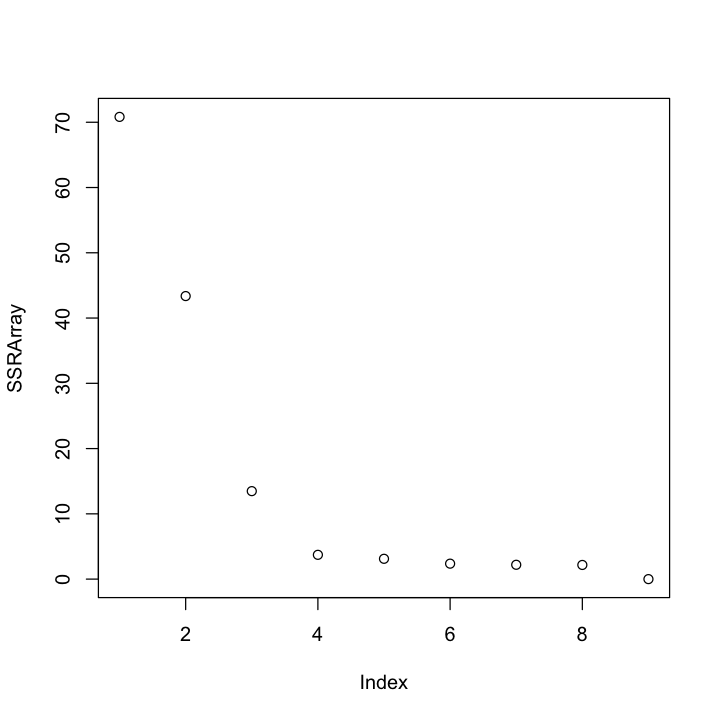

In [27]:
# An easier way to do lm for many different polynomials is to use the poly function in a loop...

SSRArray <-0

for (iPolyDegree in 1:9){

    fitModel <- lm(Y~ poly(X, iPolyDegree) )
    SSRArray[iPolyDegree] <- sum((predict(fitModel) - Y)^2)

}
    
plot(SSRArray)


## Goodness of fit

Define a __goodness of fit__ with the noise-free true error 
$$\sum \left( \bar{y}_{\rm true}(x_i) - \bar{y}_{\rm fit}(x_i)\right)^2$$
Note this goodness of fit is different than the sum-of-squared residuals
$$SSR = \sum \left( y(x_i) - \bar{y}_{\rm fit}(x_i)\right)^2,$$
for example, we can compute the SSR from data, whereas the noise-free true error can only be computed if we know the true model.

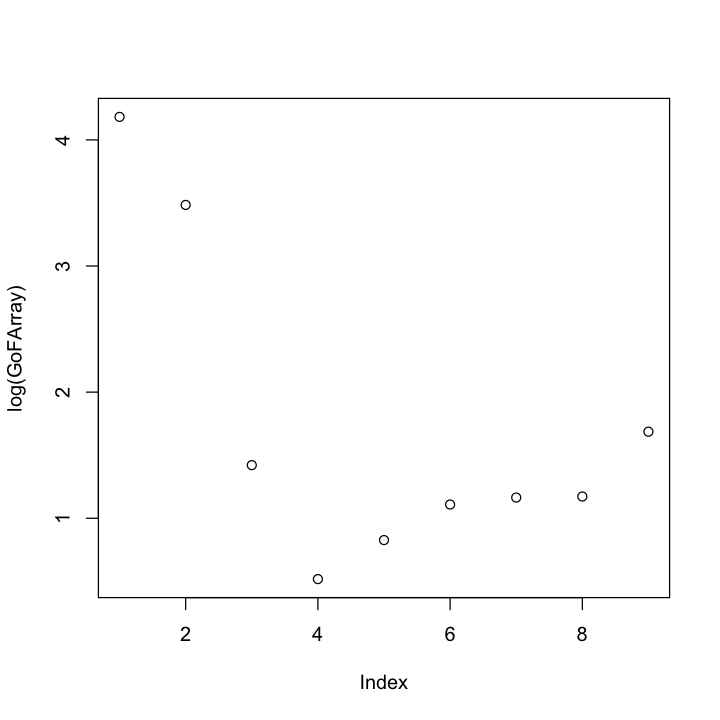

In [28]:

GoFArray <-0

fitModel <- lm(Y~ X )
GoFArray[1] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) )
GoFArray[2] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) )
GoFArray[3] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) )
GoFArray[4] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) )
GoFArray[5] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) )
GoFArray[6] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) )
GoFArray[7] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) )
GoFArray[8] <- sum((predict(fitModel) - YBar)^2)

fitModel <- lm(Y~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) )
GoFArray[9] <- sum((predict(fitModel) - YBar)^2)

plot(log(GoFArray))


## Cross-validation

How can we define goodness of fit when we do not have the ability to simulate?

Leave-one-out (LOOCV). The remaining data are called the __training set__ while the left-out data is the __validation set__. Repeat this $N_{\rm obs}$ times and compute the goodness of fit for all these. 

In [29]:

GoF <-0 # Variable to be used for average Goodness of Fit across iLeaveMeOut's

for (iLeaveMeOut in 1:NObs){
    
    XTraining <- X[-iLeaveMeOut] # everything but the one we leave out
    YTraining <- Y[-iLeaveMeOut]
    
    XValidation <- X[iLeaveMeOut] # the one we leave out
    YValidation <- Y[iLeaveMeOut]
    
    fitModel <- lm(YTraining ~ XTraining )
        
    GoF <- GoF + (predict(fitModel,data.frame(XTraining = XValidation))-YValidation)^2

}

GoF <- GoF/NObs

GoF


1 
13.68893

In [30]:

GoFArray <- 0

for (iPolyDegree in 1:8){

    
    GoF <- 0 # Variable to be used for average Goodness of Fit across iLeaveMeOut's

    for (iLeaveMeOut in 1:NObs){
    
        XTraining <- X[-iLeaveMeOut]
        YTraining <- Y[-iLeaveMeOut]
    
        XValidation <- X[iLeaveMeOut]
        YValidation <- Y[iLeaveMeOut]
    
        fitModel <- lm(YTraining ~ poly(XTraining,iPolyDegree) )
        
        # Compute the average GoF across the iLeaveMeOut's
        GoF <- GoF + (predict(fitModel,data.frame(XTraining = XValidation))-YValidation)^2
    }

    GoF <- GoF/NObs # Compute the average GoF across the iLeaveMeOut's

    GoFArray[iPolyDegree] <- GoF

}
   

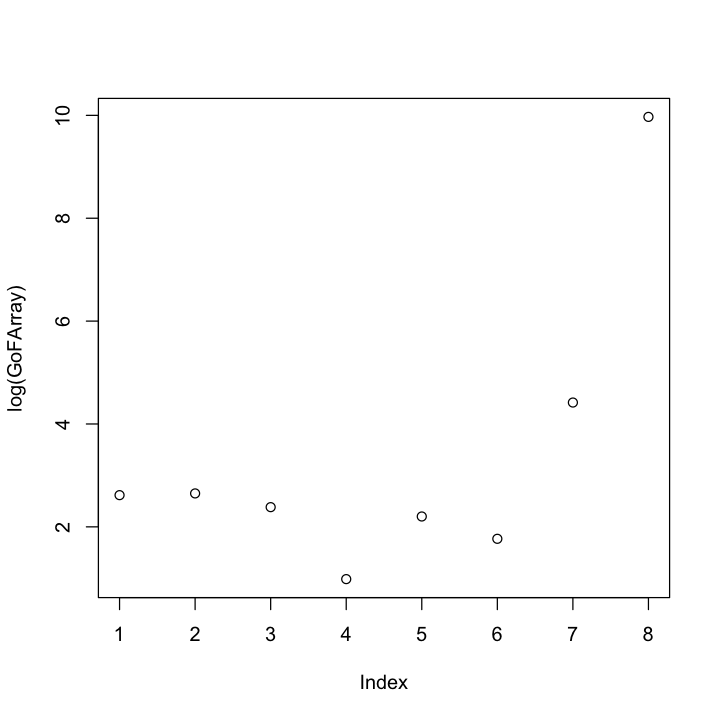

In [31]:
plot(log(GoFArray))

---
In the "true error" example at the top of this notebook, we went to a ninth-degree polynomial. In the LOOCV example, we only went to an eighth-degree polynomial. Why?

In [32]:
GoF <-0 # Variable to be used for average Goodness of Fit across iLeaveMeOut's

for (iLeaveMeOut in 1:NObs){
    
    XTraining <- X[-iLeaveMeOut] # everything but the one we leave out
    YTraining <- Y[-iLeaveMeOut]
    
    XValidation <- X[iLeaveMeOut] # the one we leave out
    YValidation <- Y[iLeaveMeOut]
    
    fitModel <- lm(YTraining ~ poly(XTraining,9) )
        
    GoF <- GoF + (predict(fitModel,data.frame(XTraining = XValidation))-YValidation)^2

}

GoF <- GoF/NObs

GoF


ERROR: Error in poly(XTraining, 9): 'degree' must be less than number of unique points


Alternatively, remove k-fold (10fCV). The remaining data are called the __training set__ while the left-out data is the __testing set__. Repeat this $N_{\rm obs}$ times and compute the goodness of fit for all these. 